In [1]:
import numpy as np
from scipy import stats,signal
import matplotlib.pyplot as plt
from scipy.optimize import minimize

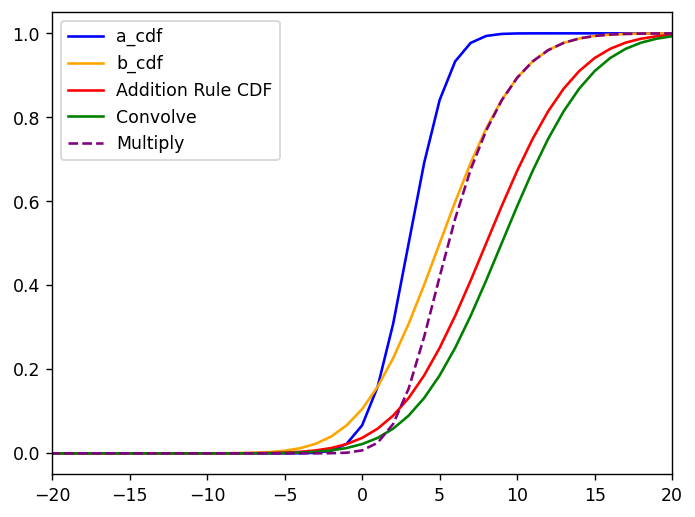

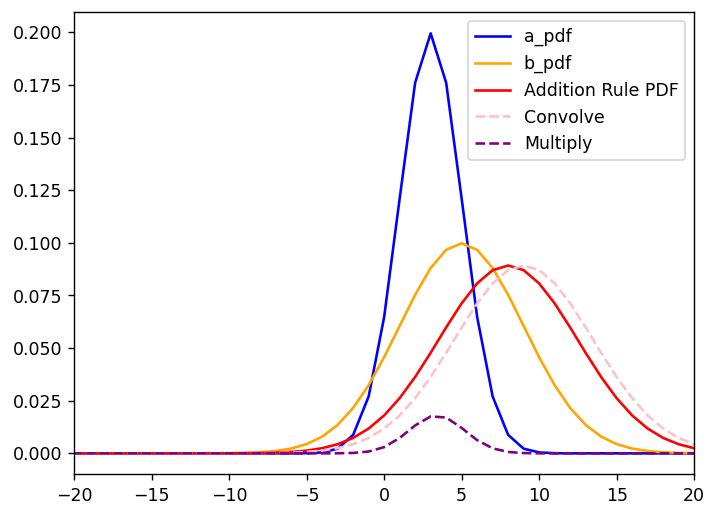

In [2]:
dx = 1
x = np.arange(-3000,3000,dx)
mu_a,mu_b = 3,5
sd_a,sd_b = 2,4
a_cdf = stats.norm.cdf(x,loc = mu_a,scale=sd_a)
a_pdf = stats.norm.pdf(x,loc = mu_a,scale=sd_a)
b_cdf = stats.norm.cdf(x,loc=mu_b,scale = sd_b)
b_pdf = stats.norm.pdf(x,loc=mu_b,scale = sd_b)

c1_cdf = stats.norm.cdf(x,loc= mu_a + mu_b,scale = np.sqrt(sd_a**2 + sd_b**2))
c1_pdf = stats.norm.pdf(x,loc= mu_a + mu_b,scale = np.sqrt(sd_a**2 + sd_b**2))

c2_pdf = signal.fftconvolve(a_pdf,b_pdf, mode = 'same')*dx
c2_cdf = signal.fftconvolve(a_cdf,b_pdf,mode='same')*dx

c3_pdf = a_pdf*b_pdf
c3_cdf = a_cdf*b_cdf

fig,ax = plt.subplots(dpi=125)
ax.plot(x,a_cdf,c='blue',label='a_cdf')
ax.plot(x,b_cdf,c='orange',label='b_cdf')
ax.plot(x,c1_cdf, c='red',label='Addition Rule CDF')
ax.plot(x,c2_cdf, c='green',label ='Convolve')
ax.plot(x,c3_cdf,ls='--', c='purple',label='Multiply')
ax.set_xlim(-20,20)
ax.legend()
plt.show()

fig,ax = plt.subplots(dpi=125)
ax.plot(x,a_pdf,c='blue',label='a_pdf')
ax.plot(x,b_pdf,c='orange',label='b_pdf')
ax.plot(x,c1_pdf, c='red',label='Addition Rule PDF')
ax.plot(x,c2_pdf, ls='--', c='pink',label ='Convolve')
ax.plot(x,c3_pdf,ls='--', c='purple',label='Multiply')
ax.set_xlim(-20,20)
ax.legend()
plt.show()

Reaction Distribution Convolve example

1380.3924811493214 78.71997165239706


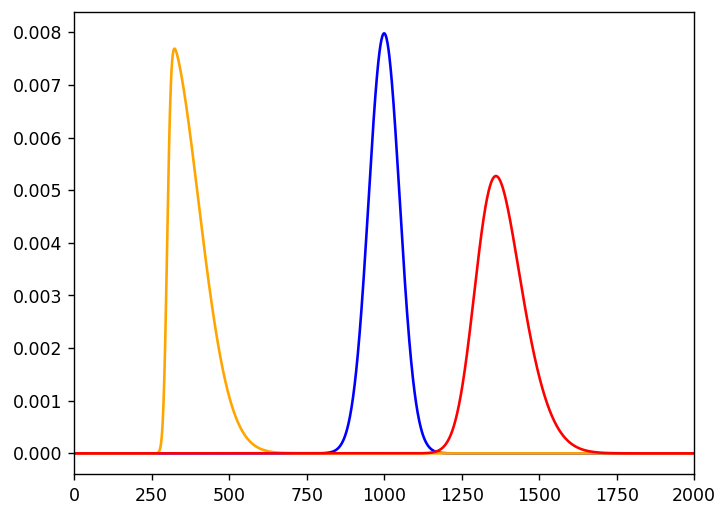

In [19]:
agent_dis = stats.norm.pdf(x,1000,50)
reaction_dis = stats.skewnorm.pdf(x,10,300,100)
agent_prob = stats.norm.cdf(x,1000,50)
reaction_prob = stats.norm.cdf(x,300,30)

conv_pdf = signal.fftconvolve(agent_dis,reaction_dis, mode = 'same') *dx
conv_cdf = signal.fftconvolve(agent_prob,reaction_dis, mode = 'same') *dx
mean = np.sum(x*conv_pdf)*dx
std = np.sqrt(np.sum((x-mean)**2*conv_pdf)*dx)
fig,ax = plt.subplots(dpi=125)

ax.plot(x,agent_dis, c= 'blue')
ax.plot(x,reaction_dis,c='orange')
ax.plot(x,conv_pdf,c='red')
ax.set_xlim(0,2000)
print(mean,std)

(-3000.0, 3000.0)

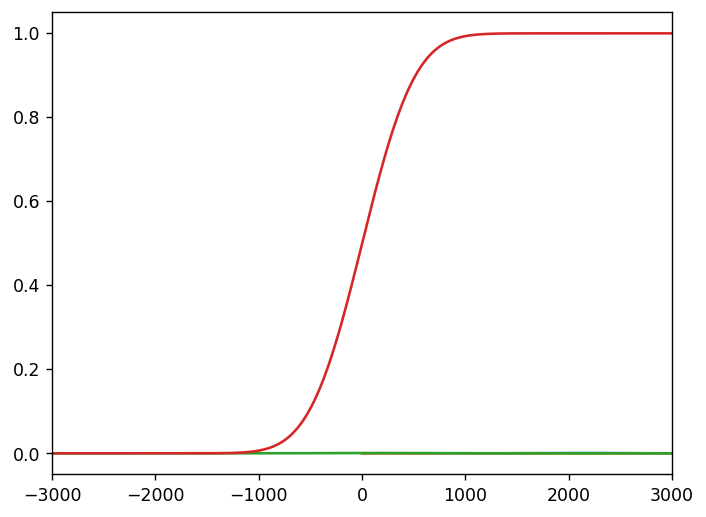

In [4]:
optimal_decision_time = 1000
timing_dis = stats.norm.pdf(x,optimal_decision_time,400)
timing_dis_neg = stats.norm.pdf(-x,optimal_decision_time,400)
timing_prob = stats.norm.cdf(x,optimal_decision_time,90)
timing_conv_subtraction_pdf = signal.fftconvolve(agent_dis,timing_dis_neg,mode='same')*dx
timing_sub_check = stats.norm.pdf(x,optimal_decision_time-1000,np.sqrt(400**2 + 50**2))
timing_sub_cdf = stats.norm.cdf(x,1000-1000,np.sqrt(400**2 + 50**2))

fig,ax = plt.subplots(dpi=125)

ax.plot(timing_dis_neg)
ax.plot(agent_dis)
ax.plot(x,timing_sub_check)
ax.plot(x,timing_sub_cdf)
ax.set_xlim(-3000,3000)

Convolution with truncated norm

In [5]:
# Create truncated norm based on optimal decision time 


In [6]:
len(timing_sub_cdf)

6000

In [7]:
timing_sub_cdf[3000 + 80]

0.5786556804176625

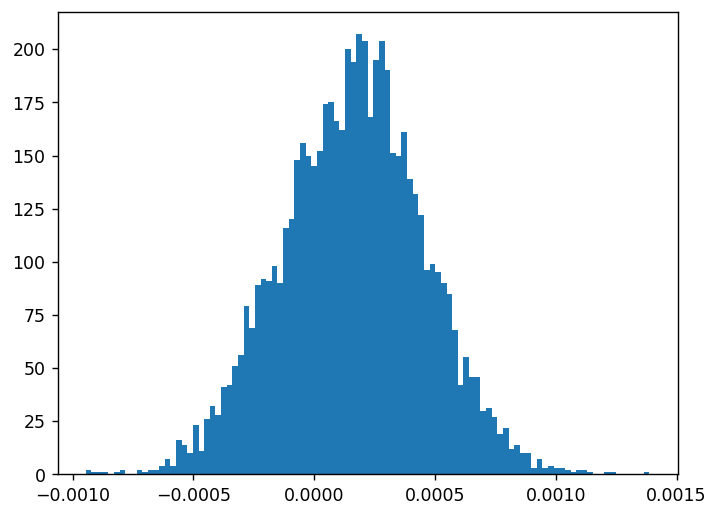

In [8]:
mu,std = stats.norm.fit(data=timing_conv_subtraction_pdf)
y = stats.norm.rvs(mu,std,len(x))
fig,ax = plt.subplots(dpi=125)
ax.hist(y,bins=100)
plt.show()

In [9]:
std

0.0002980840152255274

In [10]:
def mse_fit(params):
    mean = params[0]   
    sd = params[1]
    estimated_pdfs = stats.norm.pdf(x, loc=mean, scale=sd)
    mse = ((estimated_pdfs - timing_conv_subtraction_pdf)**2).mean()

    return mse

initParams = [1, 1]

results = minimize(mse_fit, initParams, method='Nelder-Mead')
print(results.x)


[  1.00001639 403.11286747]
